# Cvičenie 2: Perceptrón

Na dnešnom cvičení naimplementujeme najjednoduchšiu neurónovú sieť, teda perceptrón. Na úvod si zopakujeme, čo je to perceptrón, z akých častí sa skladá, aké má parametre a ako funguje - ako sa vypočítava vstup a ako sa perceptrón učí z dát. Pri tom nám pomôže štruktúra perceptrónu:

![Štruktúra perceptrónu](https://github.com/DominikVranay/neural-networks-course/blob/master/labs/sources/lab02/2.1-perceptron-structure.jpg?raw=1)

## 1. Prvý pohľad na kód

Stiahnite si [kostru riešenia](sources/lab02/lab2.zip), ktorá obsahuje čiastočnú implementáciu perceptrónu a dataset, ktorý použijeme na trénovanie. Je ním dataset [Iris](https://archive.ics.uci.edu/ml/datasets/iris), ktorý sa používa veľmi často pri ukážkach metód strojového učenia.

Kód (`lab2-perceptron.py`) obsahuje definíciu triedy `Perceptron` aj s deklaráciami členských metód. Skript navyše obsahuje funkcie `plot_decision_regions` (vizualizuje rozhodovanie perceptrónu) a `plot_dataset` (vizualizuje dataset).

Po spustení skriptu by sa vám mal zobraziť graf s datasetom. Z grafu zistite, či je možné natrénovať perceptrón na klasifikáciu dát z datasetu Iris.

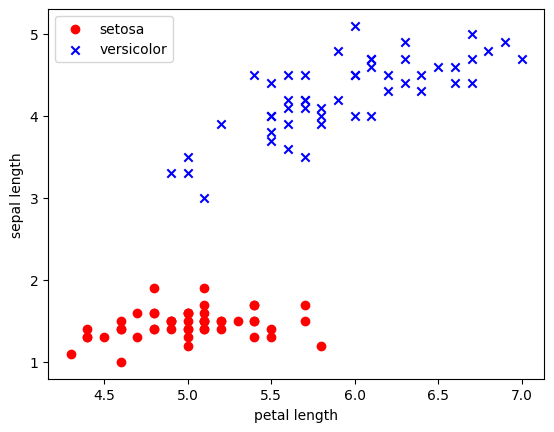

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    plt.xlabel('sepal length [cm]')
    plt.ylabel('petal length [cm]')
    plt.legend(loc='upper left')
    plt.show()


def plot_dataset(X):
    plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
    plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
    plt.xlabel('petal length')
    plt.ylabel('sepal length')
    plt.legend(loc='upper left')
    plt.show()


dFrame = pd.read_csv("iris.data", header=None)
y = dFrame.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = dFrame.iloc[0:100, [0, 2]].values
plot_dataset(X)

## 2. Implementácia doprednej časti perceptrónu

V ďalšej časti postupne implementujeme doprednú časť, teda predikciu, perceptrónu. K tomu potrebujete implementovať tri funkcie: konštruktor, `get_sum` a `predict`.

In [2]:
class Perceptron:
    def __init__(self, input_no, learning_rate):
        # TODO: initialize all parameters
        self.weights = np.random.rand(input_no) * 2 - 1
        self.bias = 0
        self.lr = learning_rate

    def get_sum(self, input_vector):
        # TODO: calculate forward pass sum
        return np.dot(input_vector, self.weights) + self.bias

    def predict(self, input_vector):
        # TODO: return result of activation 1 for class 1, -1 for class 2
        return np.where(self.get_sum(input_vector) >= 0.0, 1, -1)

    def fit(self, X, y, epochs=10):
        # TODO: train perceptron
        for epoch in range(epochs):
            incorrect = 0
            for x, y_hat in zip(X, y):
              y_pred = self.predict(x)
              diff = y_hat - y_pred
              if diff:
                  incorrect +=1
              update = self.lr * diff
              self.weights += x * update
              self.bias += update
            print(incorrect)
        return self

### 2.1. Konštruktor

Konštruktor triedy má dva parametre:
* `input_no` - celé číslo reprezentujúce počet vstupov do perceptrónu
* `learning_rate` - učiaci parameter perceptrónu, vyjadruje mieru učenia z nových dát.

Na základe parametrov konštruktora inicializujte potrebné členské premenné perceptrónu.

### 2.2. `get_sum`

Funkcia `get_sum` slúži na výpočet váženej sumy vstupov na základe príslušných váh. Pre jednoduchosť riešenia rovno pripočítame aj prah (bias) perceptrónu. Pre výpočet sumy môžete použiť metódu z knižnice `numpy`. Vstupom do funkcie je vektor vstupov (`input_vector`), ktorý môže reprezentovať jeden vstupný príklad alebo niekoľko vstupných príkladov (ak pracujete v knižnici `numpy`, nie je potrebné zvlásť ošetriť jednotlivé prípady použitia).

### 2.3. `predict`

Funkcia `predict` vypočíta celkový výstup perceptrónu pre daný vstup (parameter `input_vector`). Funkcia má vrátiť 1 pre vstup, kde vážená suma aj s biasom je minimálne 0 a -1 pre záporné sumy.

### 2.4. Testovanie

Aby ste otestovali riešenie, skúste predikovať výstup pre každý riadok z datasetu a vypíšte výsledok do konzoly - pre jednoduchosť testovania odporúčame, aby ste všetky parametre perceptrónu inicializovali na 0.

In [3]:
my_perc = Perceptron(2, 0.1)

## 3. Trénovanie perceptrónu

Posledná chýbajúca metóda triedy `Perceptron` je `fit`, ktorá slúži na trénovanie perceptrónu. V tomto kroku ju naimplementujete pričom použite nasledujúci spôsob aktualizácie váh:

$w_{i}(t+1)=w_{i}(t) + x_{i} \cdot \gamma \cdot (\hat{y} - y)$

kde:
* $w_{i}(t+1)$ je hodnota váhy $w_{i}$ v čase t+1,
* $x_{i}$ je hodnota i-tej vstupnej hodnoty
* $\gamma$ je učiaci parameter
* $\hat{y}$ je očakávaný výstup
* $y$ je vypočítaný výstup.

Funkcia `fit` má tri parametre:
* `X` - vstupné príklady (jeden vstup alebo pole vstupov)
* `y` - príslušné výstupné príklady (jeden výstup alebo pole výstupov)
* `epochs` - počet trénovacích epoch, defaultne 10.

Pre pozorovanie vývoja trénovania perceptrónu môžete vypísať počet chybných výstupov pre celý dataset.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


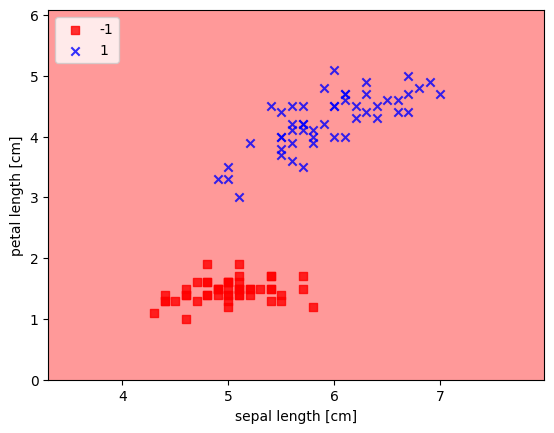

In [4]:
plot_decision_regions(X, y, my_perc)

## 4. Testovanie perceptrónu

Ak ste úspešne implementovali všetky funkcie, môžete natrénovať perceptrón pomocou dát z datasetu Iris. Dataset je už predspracovaný vo funkcii `main`. Vašou úlohou je vytvoriť nový perceptrón a natrénovať ho na dátach. Pre vizualizáciu úspešnosti trénovania vykreslite rozhodovanie perceptrónu pred a po trénovaní pomocou funkcie `plot_decision_regions`.

Ukážkové riešenie cvičenia nájdete na [tejto adrese](https://github.com/DominikVranay/neural-networks-course/blob/0011548ed92b08d2d100f79153f88b4a3dff3ae0/labs/sources/lab02/perceptron-solution.py). Aplikáciu pre XOR problém nájdete na [tejto adrese](https://github.com/DominikVranay/neural-networks-course/blob/0011548ed92b08d2d100f79153f88b4a3dff3ae0/labs/sources/lab02/perceptron-xor.py).

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


1
2
3
2
3
1
0
0
0
0


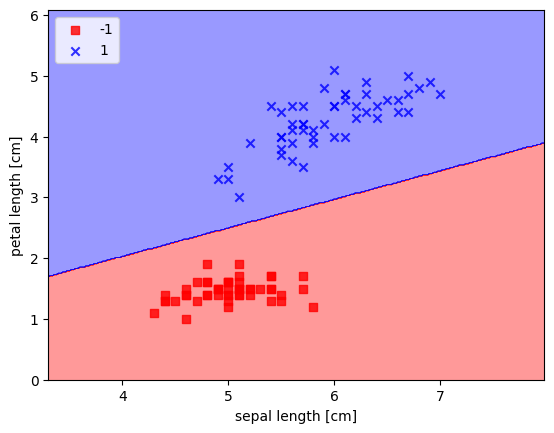

In [5]:
my_perc.fit(X, y)
plot_decision_regions(X, y, my_perc)